In [1]:
import json
import sys
sys.path.append('/home/nbuser/library')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
def get_pop(longitude, latitude):
    """
    Takes an address as a STRING input, returns the latitude and longitude coordinates as STRING outputs.
    """
    
    url = 'https://koordinates.com/services/query/v1/vector.json'

    params = {
        'key'   : 'f29039b122404e2987cca49026e229f6',
        'layer' : 	104612,
        'x'     : longitude,
        'y'     : latitude
    }

    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        return response.status_code

    pop = response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
    return pop

In [3]:
get_pop(174.904069,-37.012920)

174

In [4]:
df = pd.read_csv('Dataset for Assignment.csv')

In [5]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


In [6]:
df.describe()

,Bedrooms,Bathrooms,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years
count,1051.000000,1049.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609
std,1.169412,0.992985,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031
min,1.000000,1.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000
50%,4.000000,2.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000
75%,4.000000,3.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000
max,17.000000,8.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000


In [7]:
sample = df.head()

In [8]:
sample['Population'] = sample.apply(lambda row: get_pop(row['Longitude'], row['Latitude']), axis = 1)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
sample

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231


In [10]:
df['Population'] = df.apply(lambda row: get_pop(row['Longitude'], row['Latitude']), axis = 1)

In [11]:
df

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780501,7007917,63,15,24,33,30,39,Mangere Bridge,195
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby,102
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill,162
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa,126
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey,141


In [12]:
!curl https://www.otago.ac.nz/wellington/otago730395.xlsx -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1178k  100 1178k    0     0   332k      0  0:00:03  0:00:03 --:--:--  332k


In [13]:
df2 = pd.read_excel('otago730395.xlsx')

In [14]:
sample2= df2.head()

In [15]:
sample2.rename(columns={'SA12018_code':'SA1'}, inplace=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [16]:
sample2.head()

,SA1,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape


In [17]:
sample.merge(sample2, on='SA1')

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,...,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name


In [18]:
df2.rename(columns={'SA12018_code':'SA1'}, inplace=True)

In [19]:
df = df.merge(df2, on='SA1')

Start Cleaning Process

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df.to_csv('Combined Dataframe.csv')

In [22]:
df.isnull().values.any()

True

In [23]:
df.shape

(1051, 21)

In [24]:
df.describe()

,Bedrooms,Bathrooms,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code
count,1051.000000,1049.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,5.063749,986.503330,179.914367,141527.402474
std,1.169412,0.992985,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.913471,94.287255,71.059280,14666.542775
min,1.000000,1.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,849.000000,3.000000,110400.000000
25%,3.000000,1.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000,918.000000,138.000000,132200.000000
50%,4.000000,2.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000,959.000000,174.000000,141800.000000
75%,4.000000,3.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000,1031.000000,210.000000,152650.000000
max,17.000000,8.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000,1380.000000,789.000000,170500.000000


dropping all Null Values

In [25]:
df.dtypes

Bedrooms             int64
Bathrooms          float64
Address             object
Land area           object
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs             object
Population           int64
NZDep2018          float64
NZDep2018_Score    float64
URPopnSA1_2018       int64
SA22018_code         int64
SA22018_name        object
dtype: object

In [26]:
df['Land area'].unique()

array(['714', '564', '626', '65', '601', '100', '531', '1024', '80',
       '204', '170', '637', '640', '650', '138', '75', '724', '429',
       '520', '1381', '732', '799', '1105', '463', '681', '4068', '106',
       '713', '211', '402', '883', '883 m²', '675', '388', '1034', '1295',
       '1102', '551', '809', '1108', '745', '613', '758', '727', '59',
       '260 m²', '126', '615', '756', '3609', '431', '3648', '3177',
       '545', '420 m²', '481', '279', '120', '1037', '202', '1031', '602',
       '810', '475', '736', '110', '99', '153', '245', '2567 m²', '1500',
       '885', '480', '377', '688', '10557', '405', '561', '255', '519',
       '522', '651', '559', '420', '472', '1067', '726', '251', '220',
       '1467', '701', '826', '743', '272', '672', '772', '318', '895',
       '2028', '371', '93', '286', '623', '479', '113', '469', '898',
       '370', '422', '868', '880', '690', '238', '569', '8000', '8129',
       '447', '744', '630', '415', '804', '323', '728', '580', '140',

In [27]:
df['Land area'] = df['Land area'].str.extract('(\d+)').astype(float)

In [28]:
df['Land area'].unique()

array([  714.,   564.,   626.,    65.,   601.,   100.,   531.,  1024.,
          80.,   204.,   170.,   637.,   640.,   650.,   138.,    75.,
         724.,   429.,   520.,  1381.,   732.,   799.,  1105.,   463.,
         681.,  4068.,   106.,   713.,   211.,   402.,   883.,   675.,
         388.,  1034.,  1295.,  1102.,   551.,   809.,  1108.,   745.,
         613.,   758.,   727.,    59.,   260.,   126.,   615.,   756.,
        3609.,   431.,  3648.,  3177.,   545.,   420.,   481.,   279.,
         120.,  1037.,   202.,  1031.,   602.,   810.,   475.,   736.,
         110.,    99.,   153.,   245.,  2567.,  1500.,   885.,   480.,
         377.,   688., 10557.,   405.,   561.,   255.,   519.,   522.,
         651.,   559.,   472.,  1067.,   726.,   251.,   220.,  1467.,
         701.,   826.,   743.,   272.,   672.,   772.,   318.,   895.,
        2028.,   371.,    93.,   286.,   623.,   479.,   113.,   469.,
         898.,   370.,   422.,   868.,   880.,   690.,   238.,   569.,
      

In [29]:
df.dtypes

Bedrooms             int64
Bathrooms          float64
Address             object
Land area          float64
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs             object
Population           int64
NZDep2018          float64
NZDep2018_Score    float64
URPopnSA1_2018       int64
SA22018_code         int64
SA22018_name        object
dtype: object

In [30]:
df.dtypes

Bedrooms             int64
Bathrooms          float64
Address             object
Land area          float64
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs             object
Population           int64
NZDep2018          float64
NZDep2018_Score    float64
URPopnSA1_2018       int64
SA22018_code         int64
SA22018_name        object
dtype: object

In [31]:
df.isnull().values.any()

True

In [32]:
df.isnull().sum().sum()

3

#There is only 3 NaN values, it should be easier to just drop them

In [33]:
df = df.dropna()

In [34]:
df.isnull().values.any()

False

In [35]:
#Dropping string columns
df = df.drop(['Address','SA22018_name', 'Suburbs', 'SA1', 'URPopnSA1_2018', 'SA22018_code'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38b016c3c8>,
      dtype=object)

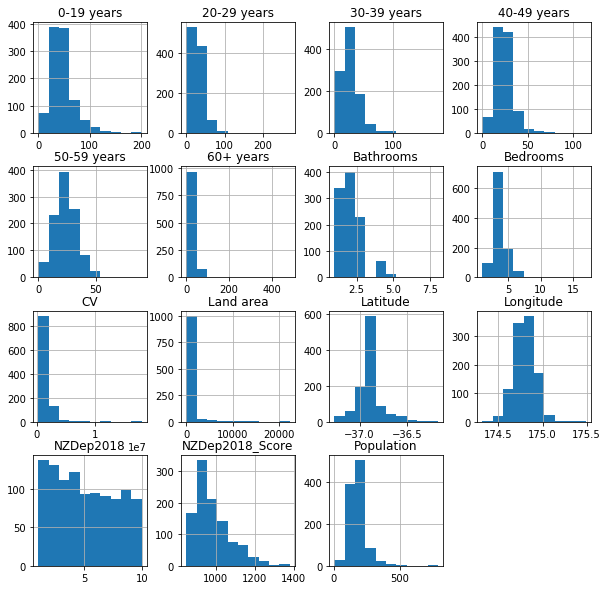

In [36]:
df.hist(figsize=(10,10))

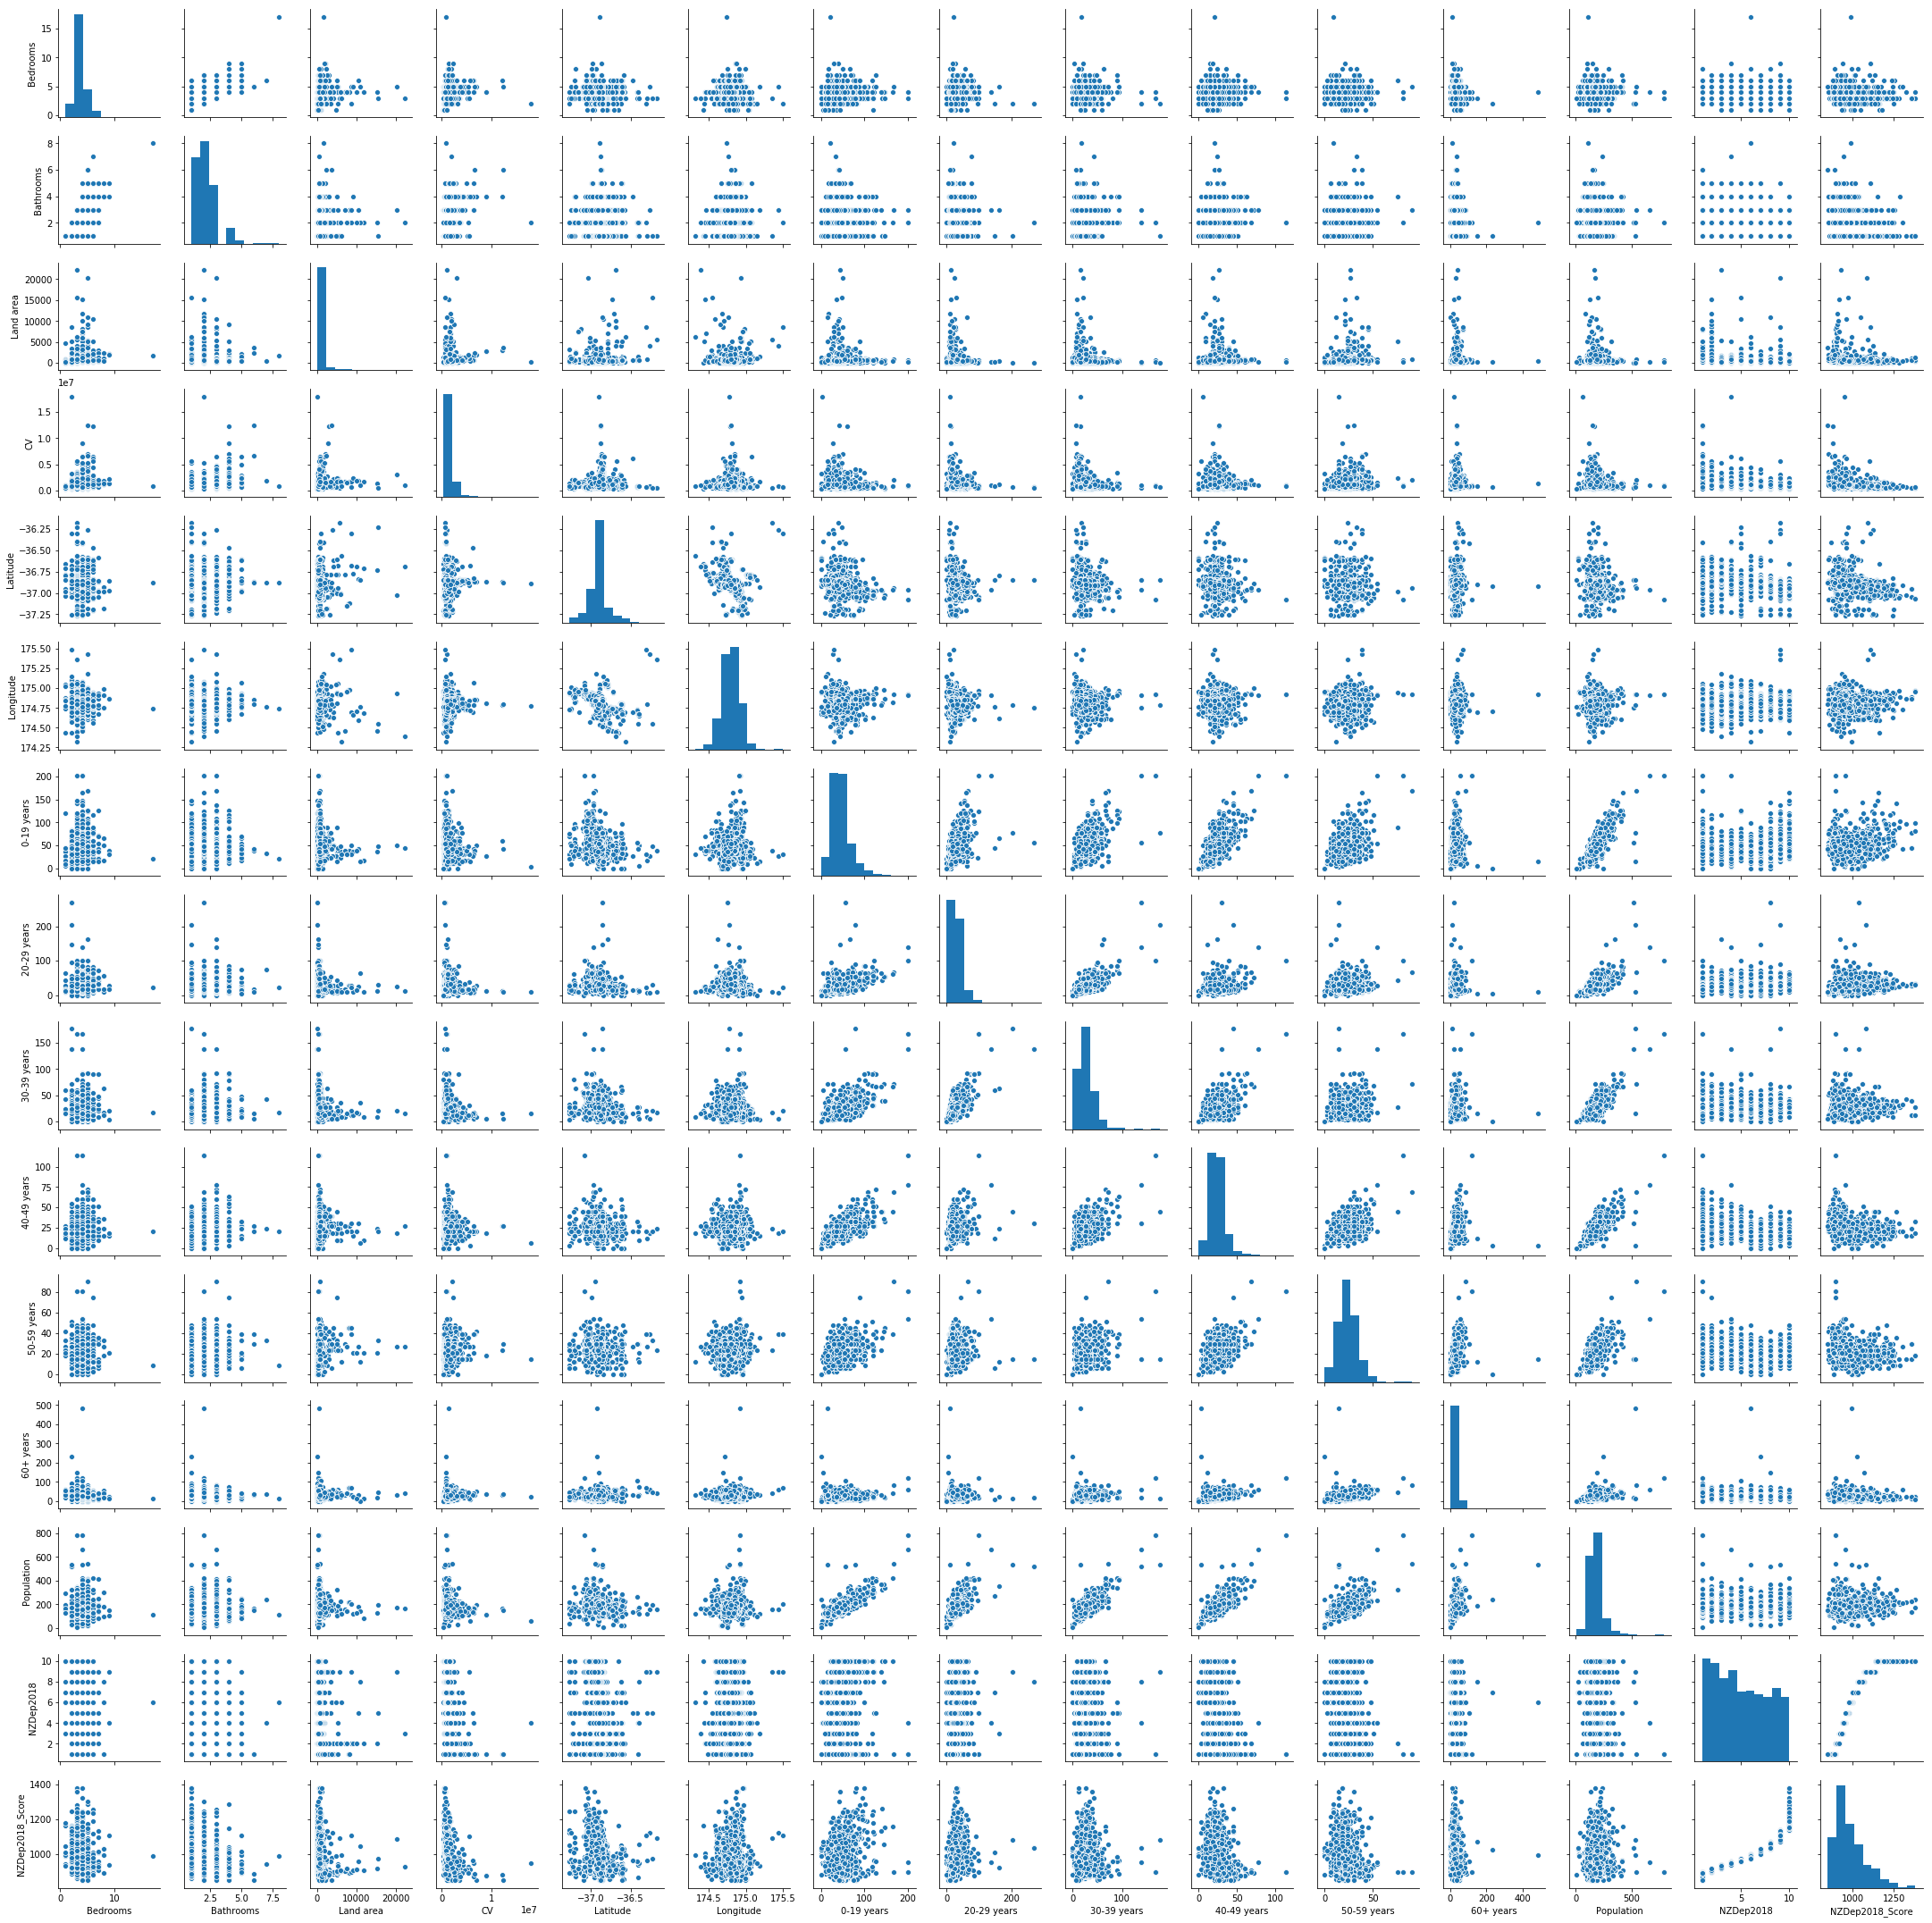

In [37]:
sns.pairplot(df, height = 2.0)

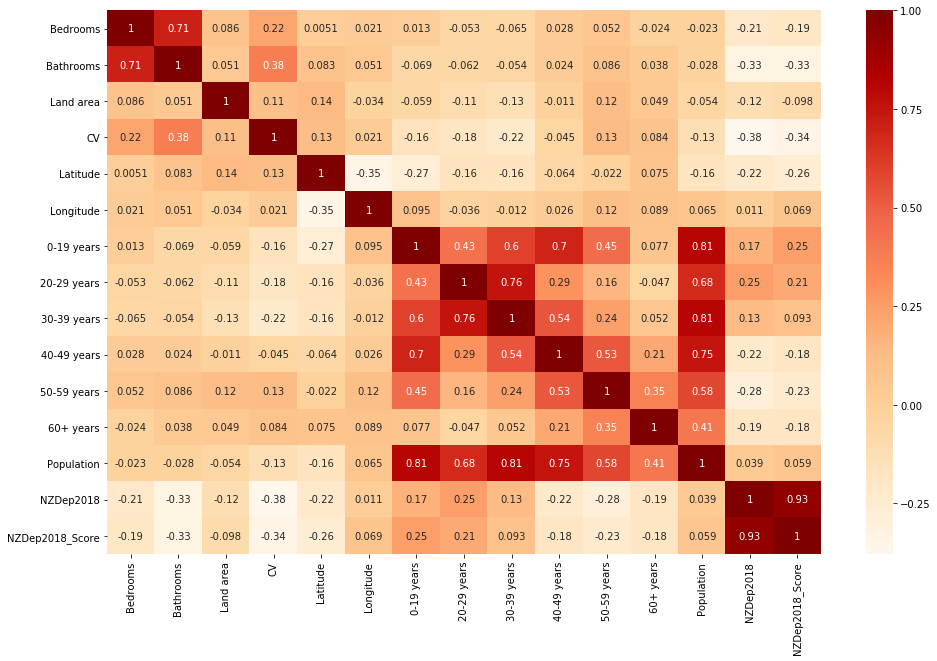

In [38]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

In [39]:
df['Land area'].unique()

array([  714.,   564.,   626.,    65.,   601.,   100.,   531.,  1024.,
          80.,   204.,   170.,   637.,   640.,   650.,   138.,    75.,
         724.,   429.,   520.,  1381.,   732.,   799.,  1105.,   463.,
         681.,  4068.,   106.,   713.,   211.,   402.,   883.,   675.,
         388.,  1034.,  1295.,  1102.,   551.,   809.,  1108.,   745.,
         613.,   758.,   727.,    59.,   260.,   126.,   615.,   756.,
        3609.,   431.,  3648.,  3177.,   545.,   420.,   481.,   279.,
         120.,  1037.,   202.,  1031.,   602.,   810.,   475.,   736.,
         110.,    99.,   153.,   245.,  2567.,  1500.,   885.,   480.,
         377.,   688., 10557.,   405.,   561.,   255.,   519.,   522.,
         651.,   559.,   472.,  1067.,   726.,   251.,   220.,  1467.,
         701.,   826.,   743.,   272.,   672.,   772.,   318.,   895.,
        2028.,   371.,    93.,   286.,   623.,   479.,   113.,   469.,
         898.,   370.,   422.,   868.,   880.,   690.,   238.,   569.,
      

In [40]:
df.head()
df.describe()
df.shape

(1048, 15)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


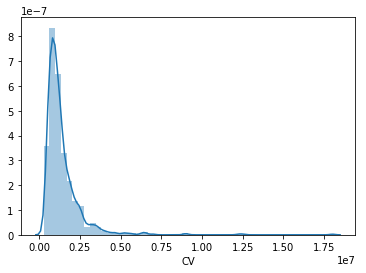

In [41]:
sns.distplot(df['CV'])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x = df.drop(['Land area','CV', 'NZDep2018', 'Longitude', '40-49 years', '60+ years'],axis=1)

In [44]:
x.head()

,Bedrooms,Bathrooms,Latitude,0-19 years,20-29 years,30-39 years,50-59 years,Population,NZDep2018_Score
0,5,3.0,-37.012920,48,27,24,24,174,997.0
1,5,3.0,-37.063672,42,18,12,15,129,881.0
2,6,4.0,-37.063580,42,18,12,15,129,881.0
3,2,1.0,-36.912996,42,6,21,12,120,908.0
4,3,1.0,-36.979037,93,27,33,21,231,1091.0


In [45]:
y = df['CV']
y.head()

0     960000
1    1250000
2    1250000
3     740000
4     630000
Name: CV, dtype: int64

In [46]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
model.coef_

array([-7.34605861e+04,  4.38878361e+05,  5.41014527e+04,  2.52919787e+03,
        2.40341962e+03, -1.77663684e+04,  1.10336610e+04, -5.32631056e+01,
       -2.68776247e+03])

In [51]:
predicted = model.predict(test_x)

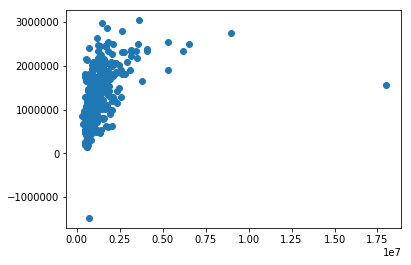

In [52]:
plt.scatter(test_y,predicted)

In [53]:
model.score(test_x,test_y)

0.15228931479308672

In [54]:
df.to_csv('Combined and Cleaned Dataframe.csv')